# Creating a DataPattern for the timepix quad

This notebook shows an example of how to create a DataPattern for a measurement with the timepix quad.



In [1]:
from pyfdd import DataPattern

import matplotlib.pyplot as plt
import numpy as np

In [2]:
filename1 = "/home/user/path/to/pattern_1.2db"
filename2 = "/home/user/path/to/pattern_2.2db"

## Creating the DataPattern

The arguments to create a data pattern are the path to the data matrix, the number of chips (2 for the time quad 1 for the others) and the real size of the central pixels.

Two DataPattern can be added together.

In [3]:
dp1 = DataPattern(file_path=filename1)
dp2 = DataPattern(file_path=filename2)
dp = dp1 + dp2

## Manipulation of the data pattern

In [4]:
# Manipulation methods

# Manipulation methods
# -Orient
dp.manip_orient('rr')  # PAD4 orientation
# use 'rr','rl','mh',mv' for rotate right, rotate left, mirror horizontal and mirror vertical
# in the desired order

# Mask
mask = np.zeros([22,22])
mask[1,1]   = mask[1,2]   = mask[1,20]  = mask[2,1]  = mask[9,11]  = mask[9,20]  = mask[10,10] = mask[10,11] =\
mask[10,12] = mask[10,19] = mask[10,20] = mask[11,2] = mask[11,11] = mask[11,20] = mask[12,1]  = mask[12,2]  = \
mask[12,3]  = mask[13,1]  = mask[13,2]  = mask[13,3] = mask[14,2]  = mask[20,1]  = mask[20,2]  = mask[20,20] = 1
dp.set_mask(mask)

# orientation to detector's point of view
dp.manip_orient('rr,rr')

# -Angular calibration
dp.manip_create_mesh(pixel_size=1.4, distance=300, reverse_x=True)

# -Remove edge pixels
dp.remove_edge_pixel(1)



## Set the angular orientation for the pattern

<IPython.core.display.Javascript object>


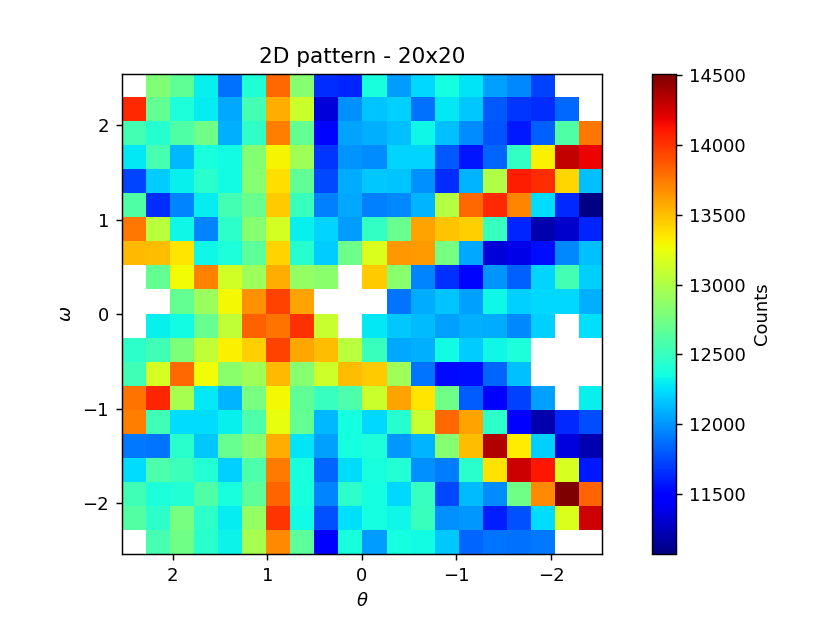

24


In [5]:
%matplotlib notebook
fg = plt.figure()
ax = fg.add_subplot('111')
dp.draw(ax, percentiles=(0.01, 0.99), plot_type='pixels')
dp.get_angle_tool()

In [6]:
print('angle widget, center ', dp.center, ', angle ', dp.angle)
# set_fit_region uses the angular values from the orientation 
# but these can also be set in the function input
dp.set_fit_region(distance=2.8)

angle widget, center  [0.8543242316128401, -0.11404440537686256] , angle  90.0


## Save as json file

In [8]:
dp.io_save_json('/home/user/pad_datapattern.json')